In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Loading the dataset
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Crop_Recommendation.csv")

# Data Preprocessing
X = df.drop('Crop', axis=1)
y = df['Crop']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Saving the model and encoder
joblib.dump(model, "crop_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [17]:
import pandas as pd
import numpy as np
import joblib

# Loading model and label encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

# Loading dataset
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\Crop_Recommendation.csv")
df.columns = df.columns.str.strip()  # Cleaning any unwanted whitespace

# Column names from the training dataset
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# User input
user_input = {}

print("Enter the following values. Type 'unknown' if not sure or press Enter to skip.")

for feature in features:
    raw = input(f"{feature}: ")
    if raw.strip().lower() in ["unknown", ""]:
        user_input[feature] = df[feature].mean()
    else:
        try:
            user_input[feature] = float(raw)
        except ValueError:
            print(f"Invalid input for {feature}. Using average value instead.")
            user_input[feature] = df[feature].mean()

input_df = pd.DataFrame([user_input])

# Prediction
prediction = model.predict(input_df)
probs = model.predict_proba(input_df)[0]
top_indices = np.argsort(probs)[::-1][:3]
top_crops = le.inverse_transform(top_indices)

# Output
print("\n🌱 Recommended Crop:", le.inverse_transform(prediction)[0])
print("Other Suitable Crops:", ", ".join(top_crops[1:]))


Please enter the following values. If you're not sure, type 'unknown' or press Enter to skip.


Nitrogen:  77
Phosphorus:  34
Potassium:  
Temperature:  21
Humidity:  80
pH_Value:  5.89
Rainfall:  210



🌱 Recommended Crop: Rice
Other Suitable Crops: Jute, Papaya


Performance Evaluation:
Accuracy: 99.32%

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.96      0.98        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange    

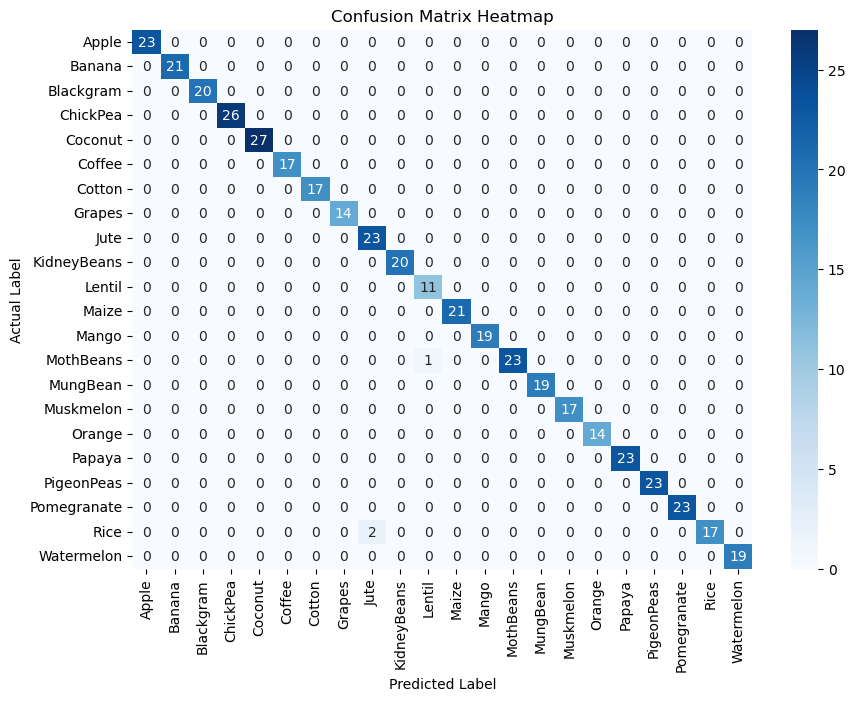

In [39]:
# Model Performance Evaluation 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df.columns = df.columns.str.strip()
X = df[features]
y = df['Crop']
y_encoded = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Performance Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print('\n')
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()